# Problem i have faced : 
 **1 Some image path in the csv aren't actually containing the true image path , That error leads to another df i have made 
    out of the folder structure
    Also The paths are windows and i am working in kaggle**
    
    

In [1]:
import torch 
import os 
from pathlib import Path
from torchvision.transforms import v2
from PIL import Image 
import pandas as pd 
from torch.utils.data import DataLoader , Dataset , random_split
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/kaggle/input/massive-skin-disease-balanced-dataset/balanced_dataset.csv")
df.sample(10)

,image_path,category
197488,D:/python files/datasets/Dermabot/balanced_dat...,Train
210155,D:/python files/datasets/Dermabot/balanced_dat...,Valid
145988,D:/python files/datasets/Dermabot/balanced_dat...,Poison Ivy Photos And Other Contact Dermatitis
148247,D:/python files/datasets/Dermabot/balanced_dat...,Poison Ivy Photos And Other Contact Dermatitis
129406,D:/python files/datasets/Dermabot/balanced_dat...,Nail Fungus And Other Nail Disease
218969,D:/python files/datasets/Dermabot/balanced_dat...,Vascular Tumors
92596,D:/python files/datasets/Dermabot/balanced_dat...,Heathy
34634,D:/python files/datasets/Dermabot/balanced_dat...,Benign
111382,D:/python files/datasets/Dermabot/balanced_dat...,Lupus And Other Connective Tissue Diseases
194570,D:/python files/datasets/Dermabot/balanced_dat...,Train


In [3]:
df = pd.read_csv("/kaggle/input/massive-skin-disease-balanced-dataset/balanced_dataset.csv")
df.iloc[:,0] = df.iloc[:,0].apply(lambda x: os.path.basename(str(x)))
df.head(10)

,image_path,category
0,balanced_dataset\Acne And Rosacea Photos\07Per...,Acne And Rosacea Photos
1,balanced_dataset\Acne And Rosacea Photos\07Rhi...,Acne And Rosacea Photos
2,balanced_dataset\Acne And Rosacea Photos\07rhn...,Acne And Rosacea Photos
3,balanced_dataset\Acne And Rosacea Photos\07Ros...,Acne And Rosacea Photos
4,balanced_dataset\Acne And Rosacea Photos\07Ros...,Acne And Rosacea Photos
5,balanced_dataset\Acne And Rosacea Photos\07Ros...,Acne And Rosacea Photos
6,balanced_dataset\Acne And Rosacea Photos\07seb...,Acne And Rosacea Photos
7,balanced_dataset\Acne And Rosacea Photos\07Ste...,Acne And Rosacea Photos
8,balanced_dataset\Acne And Rosacea Photos\07Ste...,Acne And Rosacea Photos
9,balanced_dataset\Acne And Rosacea Photos\07Vas...,Acne And Rosacea Photos


In [4]:
# Problem 1

# import os
# import pandas as pd

# ROOT_DIR = "/kaggle/input/massive-skin-disease-balanced-dataset/balanced_dataset/balanced_dataset"

# image_paths = []
# labels = []
# for root, dirs, files in os.walk(ROOT_DIR):
#     for file in files:
#         if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
#             image_paths.append(os.path.join(root, file))
#             labels.append(os.path.basename(root))  # folder name as label

# # make dataframe
# df = pd.DataFrame({
#     "image_path": image_paths,
#     "label": labels
# })

# print("Total images:", len(df))
# print(df.head())


# ^TOO Much time consuming , i have found an alternative **GLOB**

# glob is implemented in C, much faster
import glob


ROOT_DIR = "/kaggle/input/massive-skin-disease-balanced-dataset/balanced_dataset/balanced_dataset"


image_paths = glob.glob(ROOT_DIR + "/**/*.jpg", recursive=True)
# image_paths += glob.glob(ROOT_DIR + "/**/*.png", recursive=True)
# image_paths += glob.glob(ROOT_DIR + "/**/*.jpeg", recursive=True)

df = pd.DataFrame({
    "image_path": image_paths,
    "label": [os.path.basename(os.path.dirname(p)) for p in image_paths]
})
print("Total images:", len(df))

Total images: 255503


In [5]:
df.head()

,image_path,label
0,/kaggle/input/massive-skin-disease-balanced-da...,Light Diseases And Disorders Of Pigmentation
1,/kaggle/input/massive-skin-disease-balanced-da...,Light Diseases And Disorders Of Pigmentation
2,/kaggle/input/massive-skin-disease-balanced-da...,Light Diseases And Disorders Of Pigmentation
3,/kaggle/input/massive-skin-disease-balanced-da...,Light Diseases And Disorders Of Pigmentation
4,/kaggle/input/massive-skin-disease-balanced-da...,Light Diseases And Disorders Of Pigmentation


In [6]:
df.label.unique()

array(['Light Diseases And Disorders Of Pigmentation',
       'Lupus And Other Connective Tissue Diseases',
       'Acne And Rosacea Photos', 'Systemic Disease', 'Rashes',
       'Poison Ivy Photos And Other Contact Dermatitis',
       'Fu Athlete Foot', 'Vascular Tumors', 'Ba Impetigo',
       'Urticaria Hives', 'Heathy', 'Vi Shingles',
       'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Benign',
       'Hair Loss Photos Alopecia And Other Hair Diseases',
       'Tinea Ringworm Candidiasis And Other Fungal Infections',
       'Pa Cutaneous Larva Migrans',
       'Psoriasis Pictures Lichen Planus And Related Diseases',
       'Melanoma Skin Cancer Nevi And Moles',
       'Nail Fungus And Other Nail Disease', 'Malignant',
       'Scabies Lyme Disease And Other Infestations And Bites',
       'Eczema Photos', 'Exanthems And Drug Eruptions',
       'Herpes Hpv And Other Stds Photos',
       'Seborrheic Keratoses And Other Benign Tumors',
       'Actinic Keratosis Basal Cell Carc

In [7]:
label_dict = {
    'Light Diseases And Disorders Of Pigmentation': 0,
    'Lupus And Other Connective Tissue Diseases': 1,
    'Rashes': 2,
    'Poison Ivy Photos And Other Contact Dermatitis': 3,
    'Ba Impetigo': 4,
    'Vi Shingles': 5,
    'Benign': 6,
    'Hair Loss Photos Alopecia And Other Hair Diseases': 7,
    'Tinea Ringworm Candidiasis And Other Fungal Infections': 8,
    'Pa Cutaneous Larva Migrans': 9,
    'Psoriasis Pictures Lichen Planus And Related Diseases': 10,
    'Melanoma Skin Cancer Nevi And Moles': 11,
    'Malignant': 12,
    'Scabies Lyme Disease And Other Infestations And Bites': 13,
    'Exanthems And Drug Eruptions': 14,
    'Herpes Hpv And Other Stds Photos': 15,
    'Seborrheic Keratoses And Other Benign Tumors': 16,
    'Actinic Keratosis Basal Cell Carcinoma And Other Malignant Lesions': 17,
    'Vasculitis Photos': 18,
    'Vi Chickenpox': 19,
    'Ba  Cellulitis': 20,
    'Fu Ringworm': 21,
    'Cellulitis Impetigo And Other Bacterial Infections': 22,
    'Fu Nail Fungus': 23,
    'Nail Fungus And Other Nail Disease': 24,
    'Fu Athlete Foot': 25,
    'Urticaria Hives': 26,
    'Vascular Tumors': 27,
    'Atopic Dermatitis Photos': 28,
    'Eczema Photos': 29,
    'Acne And Rosacea Photos': 30,
    'Warts Molluscum And Other Viral Infections': 31,
    'Heathy': 32,
    'Systemic Disease': 33,
    'Bullous Disease Photos': 34
}
label_dict

{'Light Diseases And Disorders Of Pigmentation': 0,
 'Lupus And Other Connective Tissue Diseases': 1,
 'Rashes': 2,
 'Poison Ivy Photos And Other Contact Dermatitis': 3,
 'Ba Impetigo': 4,
 'Vi Shingles': 5,
 'Benign': 6,
 'Hair Loss Photos Alopecia And Other Hair Diseases': 7,
 'Tinea Ringworm Candidiasis And Other Fungal Infections': 8,
 'Pa Cutaneous Larva Migrans': 9,
 'Psoriasis Pictures Lichen Planus And Related Diseases': 10,
 'Melanoma Skin Cancer Nevi And Moles': 11,
 'Malignant': 12,
 'Scabies Lyme Disease And Other Infestations And Bites': 13,
 'Exanthems And Drug Eruptions': 14,
 'Herpes Hpv And Other Stds Photos': 15,
 'Seborrheic Keratoses And Other Benign Tumors': 16,
 'Actinic Keratosis Basal Cell Carcinoma And Other Malignant Lesions': 17,
 'Vasculitis Photos': 18,
 'Vi Chickenpox': 19,
 'Ba  Cellulitis': 20,
 'Fu Ringworm': 21,
 'Cellulitis Impetigo And Other Bacterial Infections': 22,
 'Fu Nail Fungus': 23,
 'Nail Fungus And Other Nail Disease': 24,
 'Fu Athlete Foot

In [8]:
df.shape

(255503, 2)

In [9]:
# df["full_path"] = df["image_path"].apply(lambda x: os.path.join(IMAGES_DIRS, x))
# df = df[df["full_path"].apply(os.path.exists)].reset_index(drop=True)
# print("Valid images:", len(df))

In [10]:
df.shape

(255503, 2)

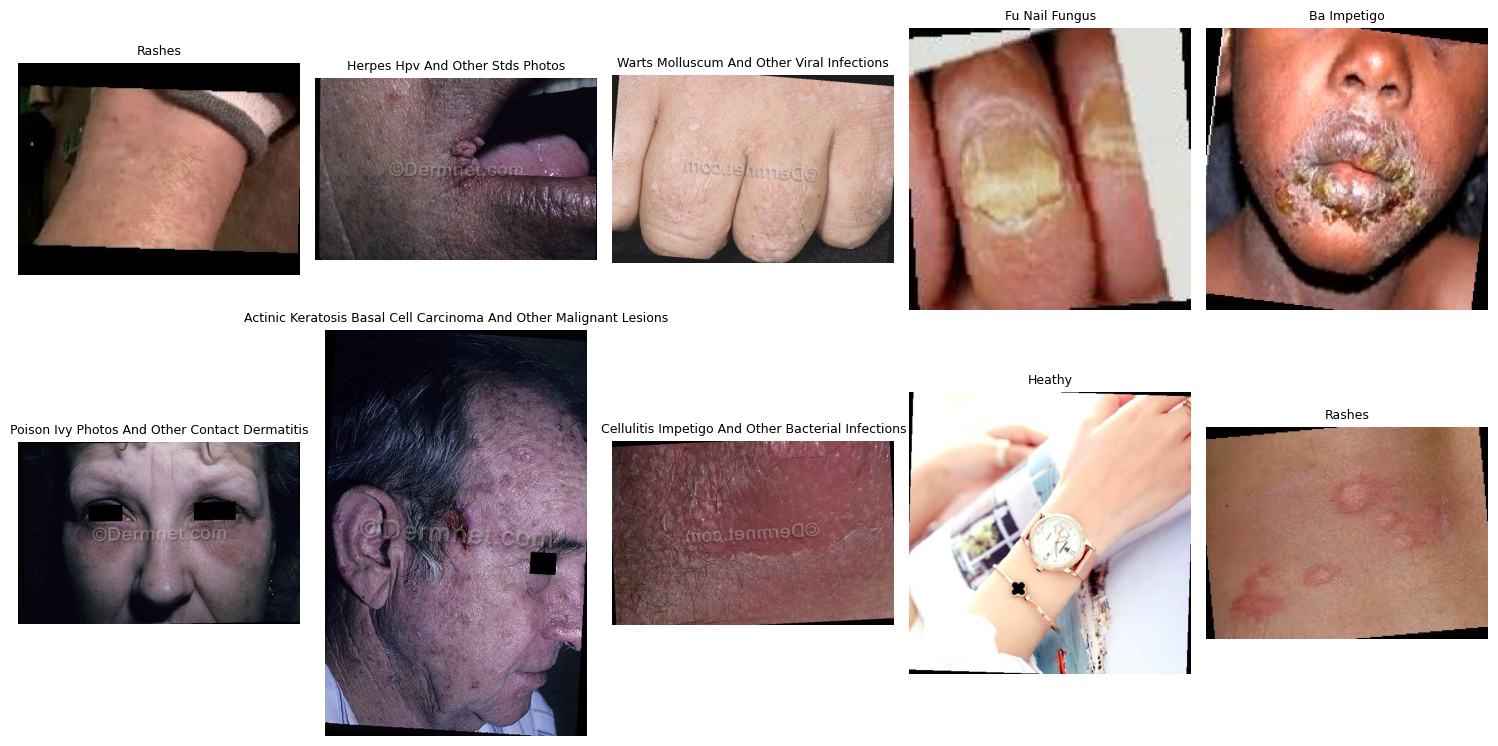

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
idxs = np.random.choice(df.index, size=10, replace=False)
plt.figure(figsize=(15, 8))
for i, idx in enumerate(idxs):
    img_path = df.loc[idx, "image_path"]
    img = Image.open(img_path).convert("RGB")
    
    plt.subplot(2, 5, i+1) 
    plt.imshow(img)
    plt.title(df.loc[idx, "label"], fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [12]:
class SKINDISEASEDATASET(Dataset):
    def __init__(self, csv_file_or_df, transforms=None, label_dict=None):
        if isinstance(csv_file_or_df, str):
            self.data = pd.read_csv(csv_file_or_df)
        else:
            self.data = csv_file_or_df.reset_index(drop=True)

        self.transforms = transforms
        self.label_dict = label_dict  

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx]["image_path"]
        label = self.data.iloc[idx]["label"]

        # Use dict to encode label 
        if self.label_dict is not None:
            label = self.label_dict[label]

        image = Image.open(img_path).convert("RGB")

        if self.transforms:
            image = self.transforms(image)

        return image, int(label)


In [13]:
## CSV FILE  as DF 
CSV_PATH = "skin_dataset.csv"
df.to_csv(CSV_PATH, index=False)


In [14]:
from torchvision.transforms import v2

train_transforms = v2.Compose([
    v2.ToImage(),
    v2.Resize((224,224)),
    v2.RandomHorizontalFlip(),
    v2.RandomRotation(0.3),
    v2.ColorJitter(contrast=0.3,brightness=0.2),
    v2.ToDtype(torch.float32, scale = True),
    v2.Normalize([0.5,0.5,0.5],
                [0.5,0.5,0.5])
])

val_transforms = v2.Compose([
    v2.ToImage(),
    v2.Resize((224,224)),
    v2.ToDtype(torch.float32, scale= True),
    v2.Normalize([0.5,0.5,0.5],
                [0.5,0.5,0.5])
])
test_transforms = v2.Compose([
    v2.ToImage(),
    v2.Resize((224,224)),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize([0.5,0.5,0.5],
                [0.5,0.5,0.5])
])


X = df.iloc[:,0].values   
y = df.iloc[:,1].values   # labels

X_train , X_temp , y_train , y_temp = train_test_split(X,
                                                      y,
                                                      test_size = 0.2,
                                                      stratify= y ,
                                                      random_state = 42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,         
    stratify=y_temp,
    random_state=42
)

print(f"X_train {X_train.shape} , X_val : {X_val.shape} , X_test : {X_test.shape}")

X_train (204402,) , X_val : (25550,) , X_test : (25551,)


In [15]:
import pandas as pd 
train_df = pd.DataFrame({"image_path": X_train, "label": y_train})
val_df   = pd.DataFrame({"image_path": X_val,   "label": y_val})
test_df  = pd.DataFrame({"image_path": X_test,  "label": y_test})

train_df.to_csv("/kaggle/working/train.csv", index=False)
val_df.to_csv("/kaggle/working/val.csv", index=False)
test_df.to_csv("/kaggle/working/test.csv", index=False)

print("Saved train.csv, val.csv, test.csv in /kaggle/working/")
print(f"Train: {train_df.shape}, Val: {val_df.shape}, Test: {test_df.shape}")

Saved train.csv, val.csv, test.csv in /kaggle/working/
Train: (204402, 2), Val: (25550, 2), Test: (25551, 2)


In [16]:
train_dataset = SKINDISEASEDATASET(
    csv_file_or_df = train_df,
    transforms = train_transforms,
    label_dict = label_dict
)

val_dataset = SKINDISEASEDATASET(
    csv_file_or_df = val_df,
    transforms = val_transforms,
    label_dict = label_dict
)

test_dataset = SKINDISEASEDATASET(
    csv_file_or_df = test_df,
    transforms = test_transforms,
    label_dict = label_dict
)
train_dataset , test_dataset , val_dataset

(<__main__.SKINDISEASEDATASET at 0x7eade9b62990>,
 <__main__.SKINDISEASEDATASET at 0x7eadf0a3e310>)

In [17]:
## DATALOADER 
train_dataloader = DataLoader(
    train_dataset ,
    batch_size = 64,
    shuffle = True,
    num_workers = 0
)
val_dataloader = DataLoader(
    val_dataset ,
    batch_size = 64,
    shuffle = False , 
    num_workers = 0
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=0
)

print(f"Train_dataloader length : {len(train_dataloader)}  | test_data_loader : {len(val_dataloader)} Test DataLoader length : {len(test_dataloader)}")

Train_dataloader length : 3194  | test_data_loader : 400 Test DataLoader length : 400


In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

**CNN MODEL WITHOUT PRETRAINED MODEL**

In [19]:
# from torch import nn
# class Model_0(nn.Module):
#     def __init__(self, input_shape : int ,
#                 hidden_units : int ,
#                output_shape: int) -> None :
#         super().__init__()
#         self.conv_block_1 = nn.Sequential(
#             nn.Conv2d(
#                 in_channels = input_shape,
#                 out_channels = hidden_units,
#                 kernel_size = 4,
#                 padding = 2 ,
#                 stride = 1
#             ),
#             nn.BatchNorm2d(hidden_units),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             # nn.Conv2d(
#             #     in_channels = hidden_units,
#             #     out_channels = hidden_units,
#             #     kernel_size = 4,
#             #     padding = 2,
#             #     stride = 2
#             # ),
#             # nn.BatchNorm2d(hidden_units),
#             # nn.ReLU(),
#             # nn.MaxPool2d(kernel_size=3, stride = 2)
#         )
#         self.conv_block_2 = nn.Sequential(
#             nn.Conv2d(
#                 in_channels = hidden_units,
#                 out_channels = hidden_units ,
#                 kernel_size = 4,
#                 padding = 2,
#                 stride = 2
#             ),
#             nn.BatchNorm2d(hidden_units),
#             nn.ReLU(),
#             nn.Dropout(0.15),
#             # nn.Conv2d(
#             #     in_channels = hidden_units,
#             #     out_channels = hidden_units,
#             #     kernel_size = 4,
#             #     padding = 2,
#             #     stride = 2
#             # ),
#             # nn.ReLU(),
#             # nn.Dropout(0.1),
#             nn.Conv2d(
#                 in_channels = hidden_units,
#                 out_channels = hidden_units,
#                 kernel_size = 4,
#                 padding = 2,
#                 stride = 2
#             ),
#             nn.BatchNorm2d(hidden_units),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size= 2, stride = 2)
#         )
#         self.gap = nn.AdaptiveAvgPool2d((1, 1))  
#         self.classifier = nn.Linear(hidden_units,
#                                     output_shape)
#     def forward(self, X):
#         X = self.conv_block_1(X)
#         #print(f"Block 1 {X.shape} \n")
#         X = self.conv_block_2(X)
#         #print(f"Block 2 {X.shape} \n")
#         X = self.gap(X)
#         X = torch.flatten(X, 1)
#         X = self.classifier(X)
#         #print(f"Classifier {X.shape}\n \n")
#         return X

# torch.manual_seed(42)
# model_0 = Model_0(input_shape=3,
#                   hidden_units=10,
#                   output_shape=len(label_dict)).to(device)
# model_0

In [20]:
# !pip install torchinfo
# from torchinfo import summary

# model_0 = Model_0(input_shape=3, hidden_units=10, output_shape=len(label_dict)).to(device)
# summary(model_0, input_size=(32, 3, 224, 224))


In [21]:
# import torch.optim as optim
# loss_fn = nn.CrossEntropyLoss()  
# optimizer = optim.Adam(model_0.parameters(), lr=0.1) #, weight_decay=1e-4)

In [22]:
def train_step(model : torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer):
  model.train()
  train_loss , train_acc = 0 , 0

  for batch, (X  , y ) in enumerate(dataloader):
    X , y = X.to(device) , y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)


  train_loss = train_loss/ len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss , train_acc

In [23]:
device

'cuda'

In [24]:
def val_step(model : torch.nn.Module,
              dataloader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module):
  test_loss , test_acc = 0 , 0
  model.eval()

  with torch.inference_mode():
    for batch , (X ,y) in enumerate(dataloader):
      X , y = X.to(device) , y.to(device)

      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits,y)
      test_loss += loss.item()

      test_pred_labels = torch.argmax(test_pred_logits,dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [25]:
def test_step(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    return all_preds, all_labels


In [26]:
# from tqdm import tqdm

# num_epochs = 10

# for epoch in range(num_epochs):
#     model_0.train()
#     running_loss, running_acc = 0, 0

#     loop = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
#     for X, y in loop:
#         X, y = X.to(device), y.to(device)
#         optimizer.zero_grad()
#         y_pred = model_0(X)
#         loss = loss_fn(y_pred, y)
#         loss.backward()
#         optimizer.step()

#         # Accuracy
#         y_pred_class = y_pred.argmax(dim=1)
#         running_loss += loss.item()
#         running_acc += (y_pred_class == y).sum().item()

#         # Update tqdm description
#         loop.set_postfix({
#             "loss": running_loss / (loop.n + 1),
#             "acc": running_acc / ((loop.n + 1) * X.size(0))
#         })

#     # Validation step (optional, can also use tqdm)
#     val_loss, val_acc = val_step(model_0, val_dataloader, loss_fn)

#     print(f"Epoch [{epoch+1}/{num_epochs}] "
#           f"Train Loss: {running_loss/len(train_dataloader):.4f} | "
#           f"Train Acc: {running_acc/len(train_dataloader.dataset):.4f} "
#           f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")


In [27]:
# inputs, labels = next(iter(train_dataloader))
# print(inputs.shape, labels.shape)


In [28]:
# for name, param in model_0.named_parameters():
#     print(name, param.device)

**WITH PRETRAINED MODEL**

In [41]:
import torch
from torch import nn, optim
from torchvision import models
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = len(label_dict)
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Freeze feature extractor
for param in model.parameters():
    param.requires_grad = False

# Replace classifier
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.1)  # only train classifier

# --- Training & Validation Functions ---
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()
    running_loss, running_acc = 0, 0
    loop = tqdm(dataloader, leave=False)
    for X, y in loop:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_acc += (y_pred.argmax(dim=1) == y).sum().item()

        loop.set_postfix({
            "loss": running_loss / (loop.n + 1),
            "acc": running_acc / ((loop.n + 1) * X.size(0))
        })

    train_loss = running_loss / len(dataloader)
    train_acc = running_acc / len(dataloader.dataset)
    return train_loss, train_acc

def val_step(model, dataloader, loss_fn):
    model.eval()
    running_loss, running_acc = 0, 0
    with torch.no_grad():
        loop = tqdm(dataloader, leave=False)
        for X, y in loop:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            running_loss += loss.item()
            running_acc += (y_pred.argmax(dim=1) == y).sum().item()

            loop.set_postfix({
                "val_loss": running_loss / (loop.n + 1),
                "val_acc": running_acc / ((loop.n + 1) * X.size(0))
            })

    val_loss = running_loss / len(dataloader)
    val_acc = running_acc / len(dataloader.dataset)
    return val_loss, val_acc

# --- Training Loop ---
num_epochs = 5
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer)
    val_loss, val_acc = val_step(model, val_dataloader, loss_fn)
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

# --- Optional: Fine-tune entire model ---
for param in model.parameters():
    param.requires_grad = True

optimizer = optim.Adam(model.parameters(), lr=1e-4)  # smaller LR for fine-tuning


Epoch 1/5


Train Loss: 13.7372 | Train Acc: 0.4546 | Val Loss: 12.3308 | Val Acc: 0.4832
Epoch 3/5


Train Loss: 13.8975 | Train Acc: 0.4646 | Val Loss: 13.0077 | Val Acc: 0.4921
Epoch 4/5


Train Loss: 14.2801 | Train Acc: 0.4679 | Val Loss: 13.9413 | Val Acc: 0.4848
Epoch 5/5


Train Loss: 14.4633 | Train Acc: 0.4698 | Val Loss: 14.6436 | Val Acc: 0.4779


In [1]:
# --- Test / Evaluation ---
model.eval()  # set to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():
    loop = tqdm(test_dataloader, desc="Testing", leave=False)
    for X, y in loop:
        X, y = X.to(device), y.to(device)
        outputs = model(X)
        preds = torch.argmax(outputs, dim=1)

        all_preds.append(preds.cpu())
        all_labels.append(y.cpu())

all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)

test_acc = (all_preds == all_labels).float().mean().item()
print(f"Test Accuracy: {test_acc:.4f}")


NameError: name 'model' is not defined

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(all_labels, all_preds, target_names=list(label_dict.keys())))



                                                                    precision    recall  f1-score   support

                      Light Diseases And Disorders Of Pigmentation       0.35      0.19      0.25       754
                        Lupus And Other Connective Tissue Diseases       0.32      0.27      0.29       774
                                                            Rashes       0.86      0.66      0.74       702
                    Poison Ivy Photos And Other Contact Dermatitis       0.29      0.53      0.37       794
                                                       Ba Impetigo       0.96      0.98      0.97       710
                                                       Vi Shingles       0.93      0.97      0.95       728
                                                            Benign       0.80      0.86      0.83       646
                 Hair Loss Photos Alopecia And Other Hair Diseases       0.42      0.94      0.58       796
            Tinea Ringworm 

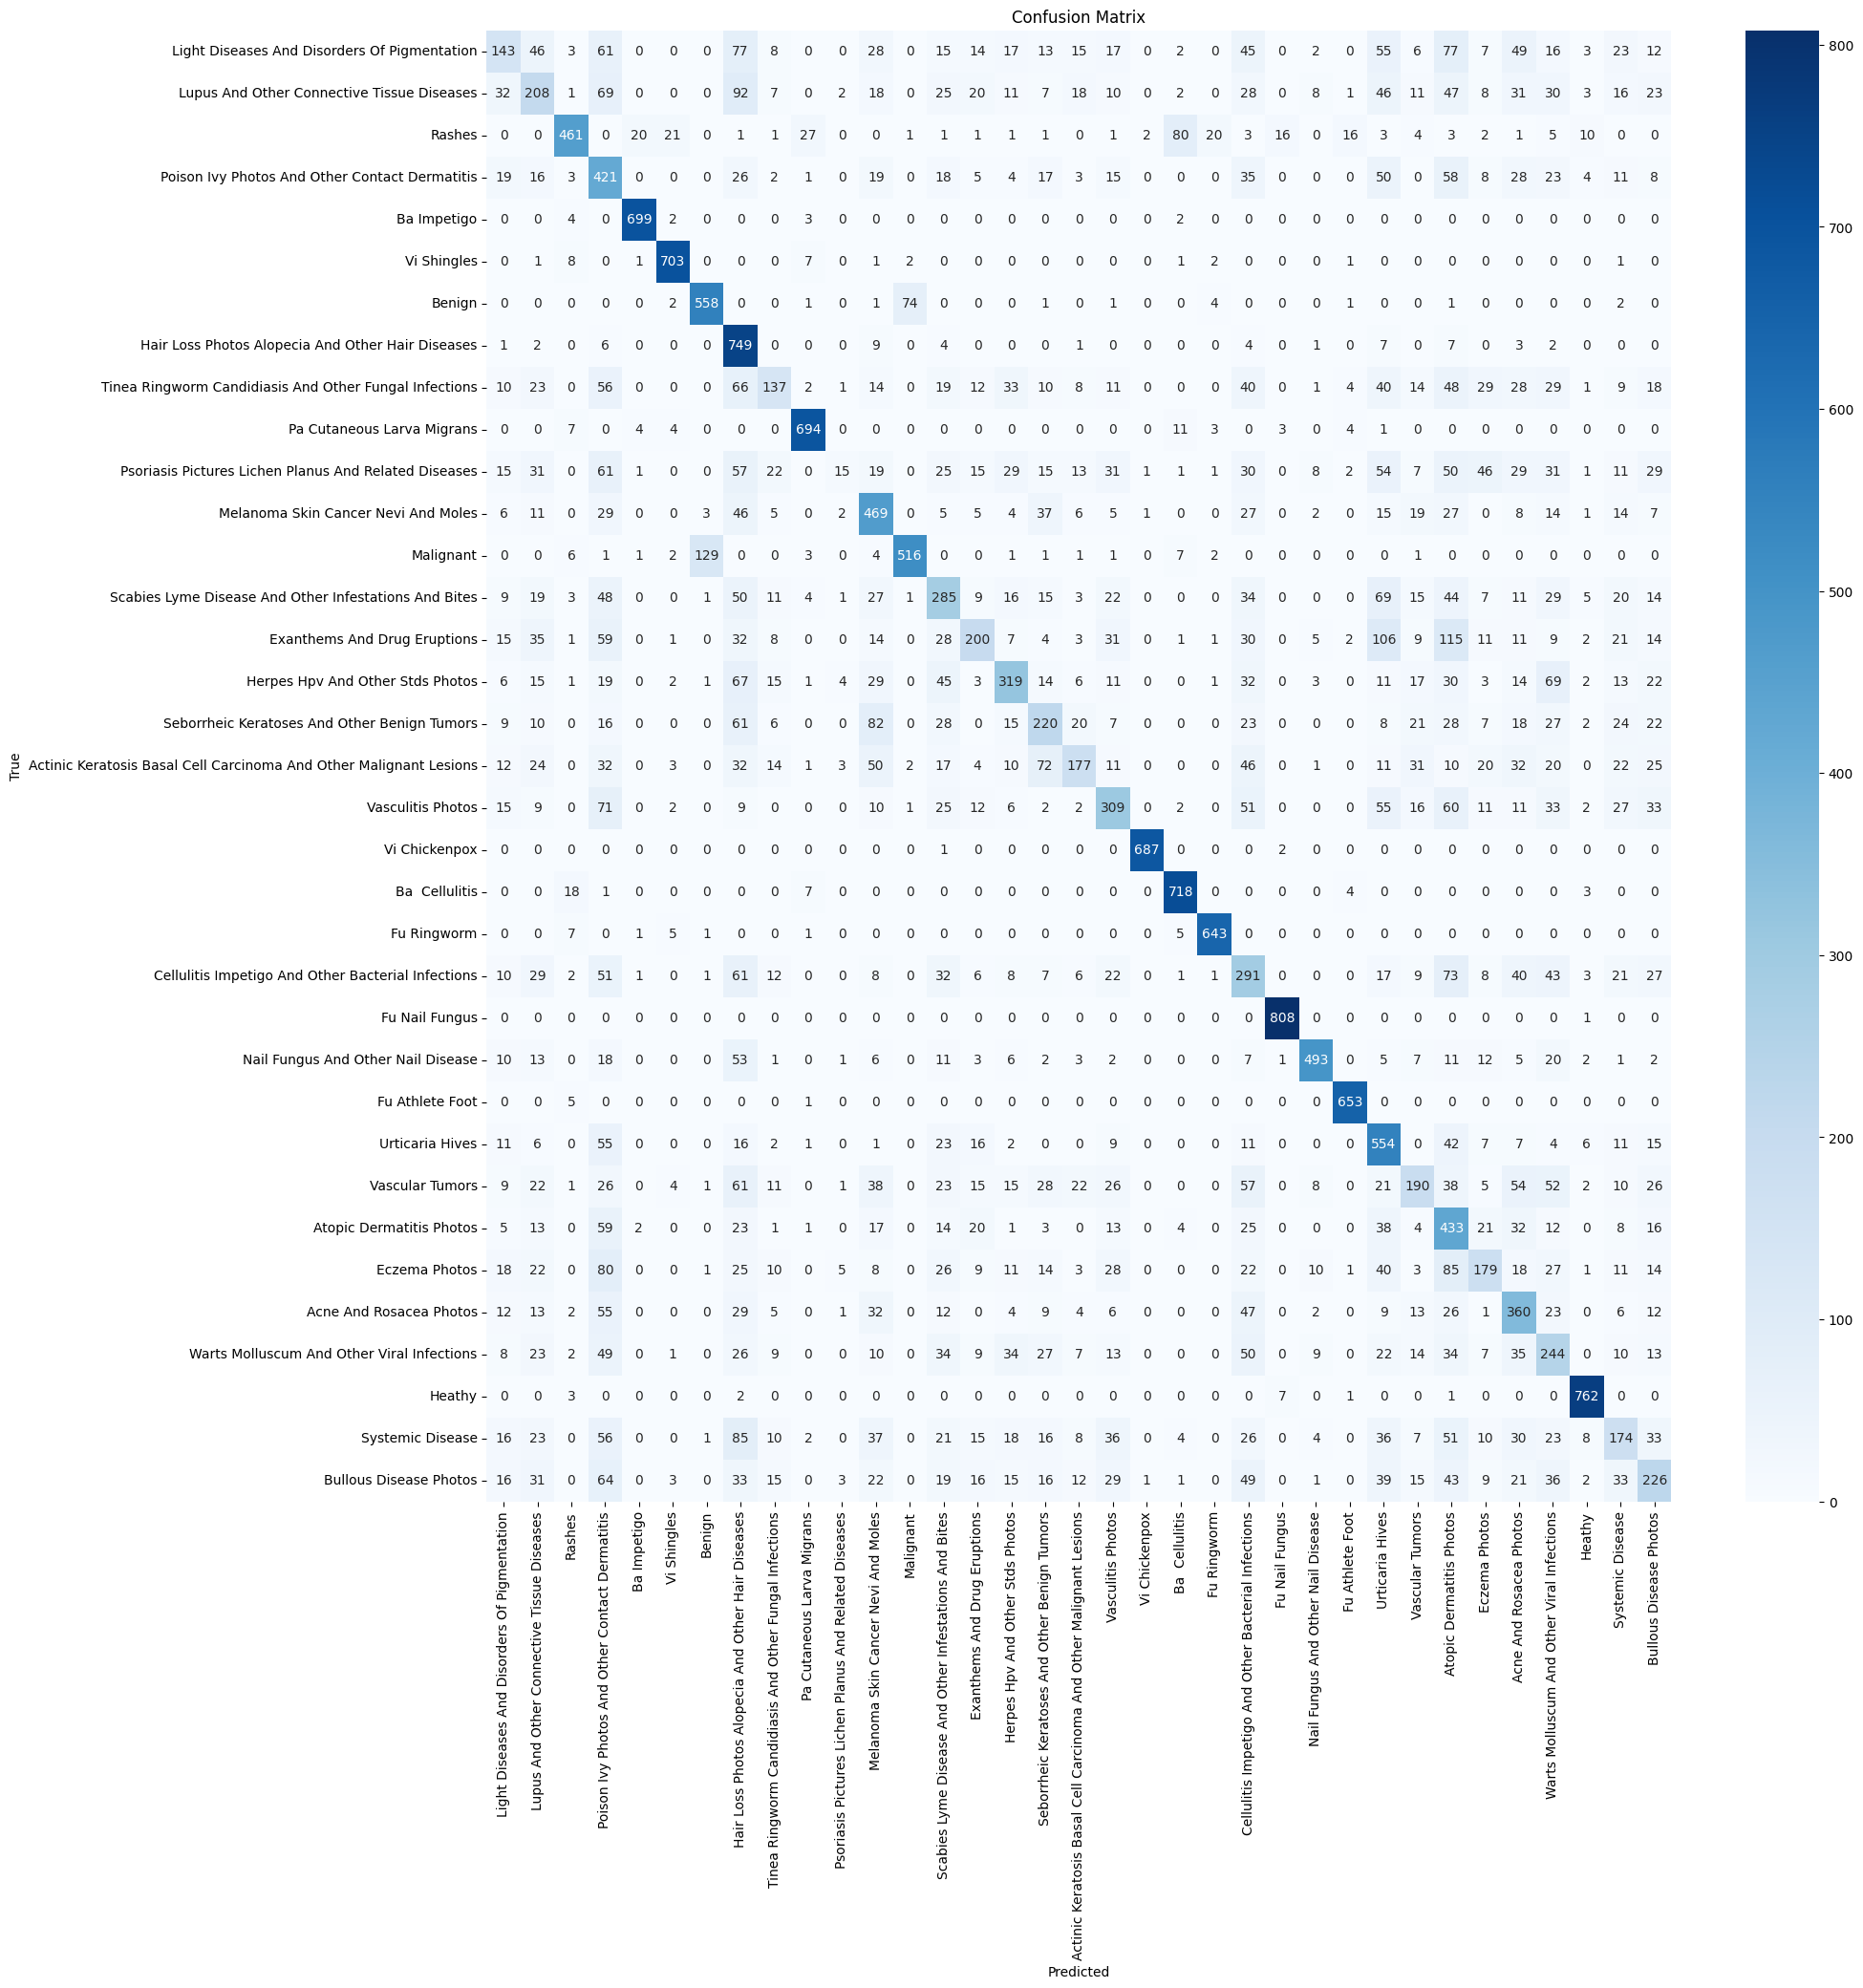

In [32]:

import seaborn as sns
cm = confusion_matrix(all_labels, all_preds)

# visuaLise with heatmap
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

